In [7]:
from pathlib import Path
import json 
import yaml

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [8]:
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [9]:
datasets = [
    "kuhar",
    "motionsense",
    "uci",
]


labels_activity = {
    0: "sit",
    1: "stand",
    2: "walk",
    3: "stair up",
    4: "stair down",
    5: "run",
    6: "stair up and down",
}

# Filters

# def filter_same_train_test(df):
#     df["anded"] = False
#     for d in datasets:
#         df["anded"] |= df[f"{d} - train"] & df[f"{d} - test"]
#     df = df.loc[df["anded"] == False]
#     return df.drop(columns=["anded"])


def drop_es_on_train(df):
    return df.loc[df["extrasensory - train"] == False]

def only_fft(df):
    return df.loc[df["transforms"] == "with_fft_all.0"]

def only_time(df):
    return df.loc[df["transforms"] == "no_transform.0"]

def only_all_axis(df):
    return df.loc[
        (df["use accel-x"]) & (df["use accel-y"]) & (df["use accel-z"]) &
        (df["use gyro-x"]) & (df["use gyro-y"]) & (df["use gyro-z"])
    ]

In [10]:
results_file = Path("results.csv")
results = pd.read_csv(results_file)

In [11]:
results

,execution_id,classification_time,load_time,reduce_time,transform_time,reduce_on,classifier,reducer,transforms,number runs,reducer_datasets,train_datasets,test_datasets,sensors used,scaler,umap components,accuracy (mean),accuracy (std),f1-score macro (mean),f1-score macro (std),f1-score micro (mean),f1-score micro (std),f1-score weighted (mean),f1-score weighted (std)
0,1823,2.444203,3.825134,59.139599,0.576500,all,svm,umap-5-all,with_fft_all.0,5,"motionsense.train, motionsense.validation","motionsense.train, motionsense.validation",motionsense.test,"accel-x, accel-y, accel-z",minmax_scaler,5,0.862524,0.000000e+00,0.862082,1.110223e-16,0.862524,0.000000e+00,0.862082,0.000000e+00
1,1266,6.624574,3.801349,104.526902,0.475169,all,randomforest-100,umap-4-all,with_fft_all.0,5,"uci.train, uci.validation","motionsense.train, motionsense.validation",motionsense.test,"gyro-x, gyro-y, gyro-z",no_scaler,4,0.695857,2.729073e-03,0.686683,2.999311e-03,0.695857,2.729073e-03,0.686683,2.999311e-03
2,2921,4.639587,3.944795,103.834193,0.063797,all,randomforest-100,umap-8-all,no_transform.0,5,"motionsense.train, motionsense.validation","kuhar.train, kuhar.validation",kuhar.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",minmax_scaler,8,0.536111,1.832070e-02,0.517615,1.956229e-02,0.536111,1.832070e-02,0.517615,1.956229e-02
3,4006,4.707443,4.457042,131.633003,0.042458,all,svm,umap-10-all,no_transform.0,5,"kuhar.train, kuhar.validation","motionsense.train, motionsense.validation",motionsense.test,"accel-x, accel-y, accel-z",std_scaler,10,0.625235,0.000000e+00,0.617285,0.000000e+00,0.625235,0.000000e+00,0.617285,0.000000e+00
4,4825,0.483623,3.875972,126.175050,0.434992,all,knn-5,umap-15-all,with_fft_all.0,5,"kuhar.train, kuhar.validation","motionsense.train, motionsense.validation",motionsense.test,"gyro-x, gyro-y, gyro-z",std_scaler,15,0.738230,0.000000e+00,0.731111,0.000000e+00,0.738230,0.000000e+00,0.731111,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669,1400,0.141831,3.729206,86.881783,0.492948,all,knn-5,umap-4-all,with_fft_all.0,5,"motionsense.train, motionsense.validation","kuhar.train, kuhar.validation",kuhar.test,"gyro-x, gyro-y, gyro-z",minmax_scaler,4,0.583333,0.000000e+00,0.582449,0.000000e+00,0.583333,0.000000e+00,0.582449,0.000000e+00
5670,2281,1.413008,6.247566,100.557598,1.178483,all,svm,umap-6-all,with_fft_all.0,5,"motionsense.train, motionsense.validation","kuhar.train, kuhar.validation",kuhar.test,"accel-x, accel-y, accel-z",std_scaler,6,0.472222,0.000000e+00,0.412405,5.551115e-17,0.472222,0.000000e+00,0.412405,5.551115e-17
5671,1821,2.434126,3.266445,60.061845,0.581772,all,svm,umap-5-all,with_fft_all.0,5,"motionsense.train, motionsense.validation","motionsense.train, motionsense.validation",motionsense.test,"accel-x, accel-y, accel-z",no_scaler,5,0.866290,1.110223e-16,0.866078,1.110223e-16,0.866290,1.110223e-16,0.866078,1.110223e-16
5672,4860,4.736194,4.914390,32.453975,0.085545,all,randomforest-100,umap-20-all,no_transform.0,5,"kuhar.train, kuhar.validation","kuhar.train, kuhar.validation",kuhar.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",no_scaler,20,0.513889,2.106354e-02,0.507595,2.290255e-02,0.513889,2.106354e-02,0.507595,2.290255e-02


In [15]:
# x = filter_same_train_test(results)
x = results.sort_values(by="accuracy (mean)", ascending=False).reset_index(drop=True)
x

,execution_id,classification_time,load_time,reduce_time,transform_time,reduce_on,classifier,reducer,transforms,number runs,reducer_datasets,train_datasets,test_datasets,sensors used,scaler,umap components,accuracy (mean),accuracy (std),f1-score macro (mean),f1-score macro (std),f1-score micro (mean),f1-score micro (std),f1-score weighted (mean),f1-score weighted (std),anded
0,3191,7.634426,5.974655,90.359499,2.441511,all,randomforest-100,umap-8-all,with_fft_all.0,5,"motionsense.train, motionsense.validation","motionsense.train, motionsense.validation",motionsense.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",minmax_scaler,8,0.917702,0.002114,0.917748,2.110916e-03,0.917702,0.002114,0.917748,0.002111,False
1,3675,8.073816,8.271394,90.113608,3.065850,all,randomforest-100,umap-9-all,with_fft_all.0,5,"motionsense.train, motionsense.validation","motionsense.train, motionsense.validation",motionsense.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",no_scaler,9,0.916949,0.002097,0.916970,2.089616e-03,0.916949,0.002097,0.916970,0.002090,False
2,5133,16.710546,4.290298,108.607090,1.927219,all,randomforest-100,umap-20-all,with_fft_all.0,5,"motionsense.train, motionsense.validation","motionsense.train, motionsense.validation",motionsense.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",no_scaler,20,0.916761,0.000960,0.916953,9.382396e-04,0.916761,0.000960,0.916953,0.000938,False
3,4163,8.639050,5.672655,67.722416,1.516408,all,randomforest-100,umap-10-all,with_fft_all.0,5,"motionsense.train, motionsense.validation","motionsense.train, motionsense.validation",motionsense.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",minmax_scaler,10,0.916196,0.001332,0.916329,1.294773e-03,0.916196,0.001332,0.916329,0.001295,False
4,2379,0.424269,6.189903,71.544112,1.865420,all,knn-5,umap-6-all,with_fft_all.0,5,"motionsense.train, motionsense.validation","motionsense.train, motionsense.validation",motionsense.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",no_scaler,6,0.916196,0.000000,0.916246,1.110223e-16,0.916196,0.000000,0.916246,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669,54,4.010298,4.475793,63.661747,0.046625,all,randomforest-100,umap-2-all,no_transform.0,5,"kuhar.train, kuhar.validation","uci.train, uci.validation",uci.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",no_scaler,2,0.362029,0.005376,0.361220,5.276774e-03,0.362029,0.005376,0.361220,0.005277,False
5670,2040,1.544973,6.553704,87.972692,0.033412,all,svm,umap-6-all,no_transform.0,5,"uci.train, uci.validation","kuhar.train, kuhar.validation",kuhar.test,"accel-x, accel-y, accel-z",no_scaler,6,0.361111,0.000000,0.291186,0.000000e+00,0.361111,0.000000,0.291186,0.000000,False
5671,217,0.319985,6.079311,58.467268,0.050580,all,knn-5,umap-2-all,no_transform.0,5,"kuhar.train, kuhar.validation","uci.train, uci.validation",uci.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",std_scaler,2,0.353623,0.000000,0.348695,0.000000e+00,0.353623,0.000000,0.348695,0.000000,False
5672,55,6.271670,4.753296,59.968439,0.051167,all,randomforest-100,umap-2-all,no_transform.0,5,"kuhar.train, kuhar.validation","uci.train, uci.validation",uci.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",std_scaler,2,0.349275,0.003175,0.350086,3.559586e-03,0.349275,0.003175,0.350086,0.003560,False


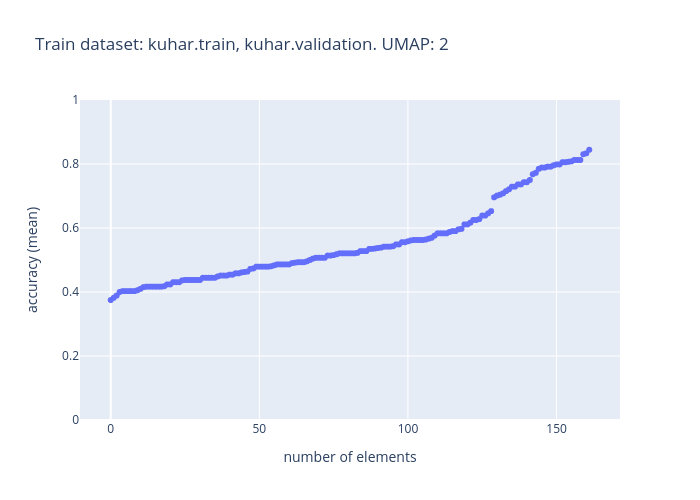

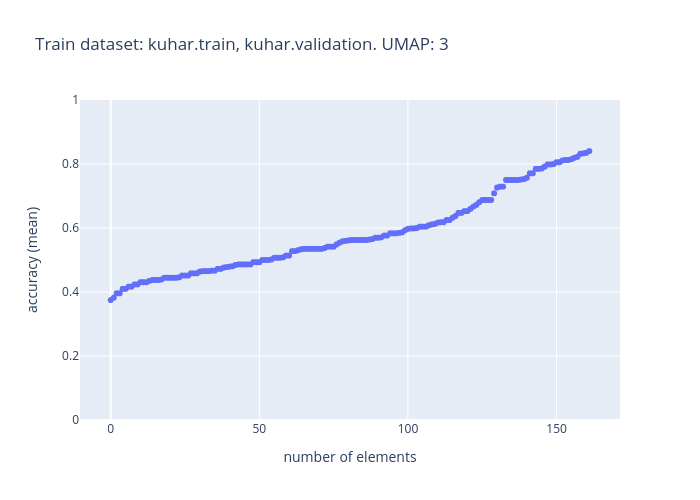

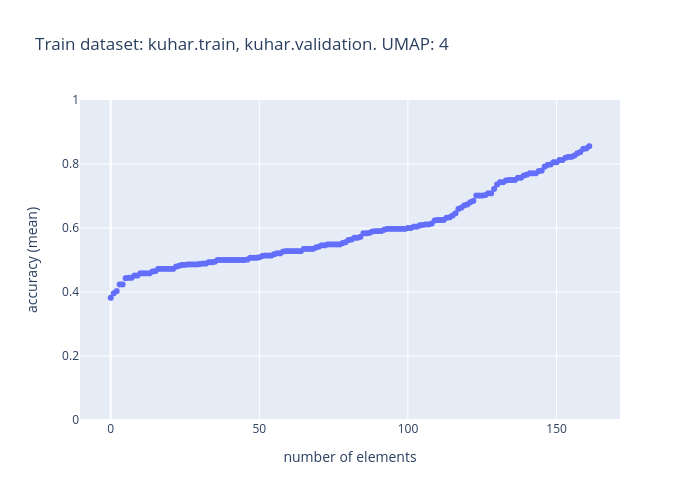

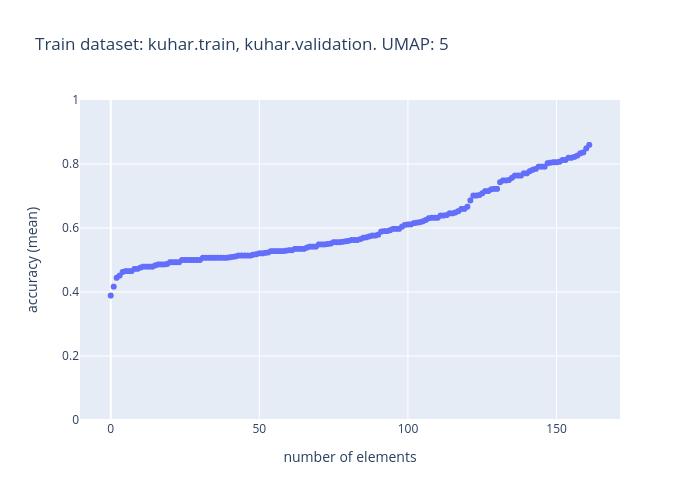

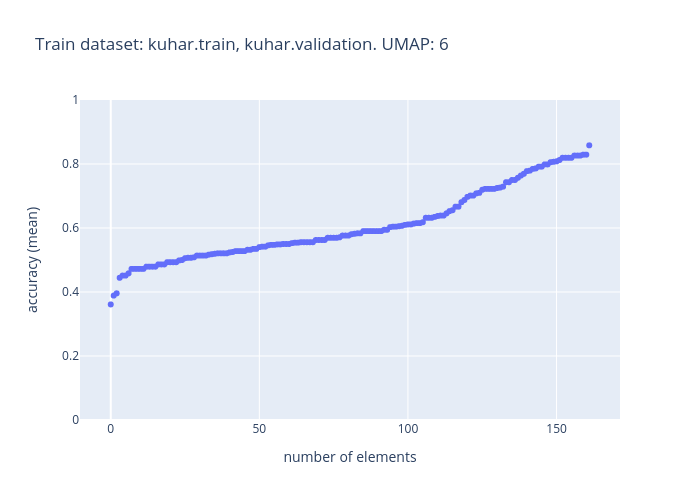

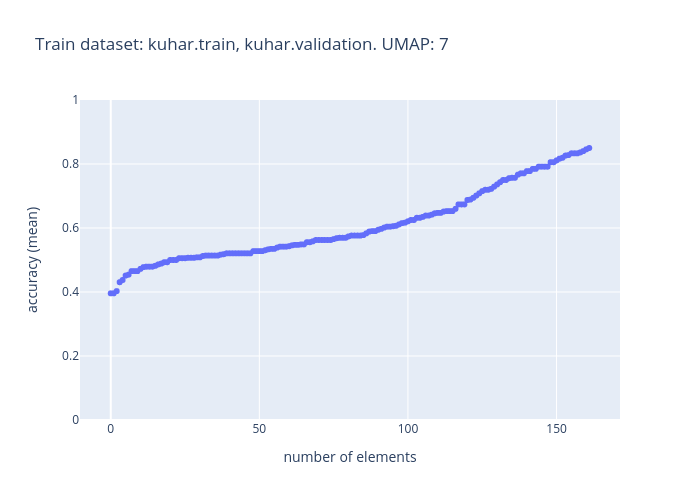

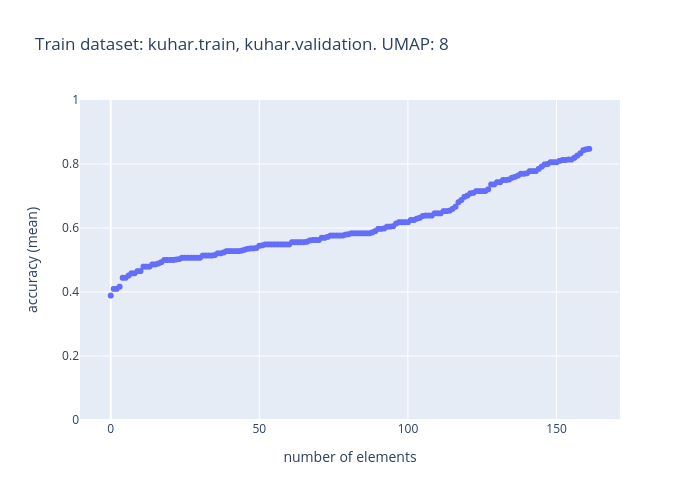

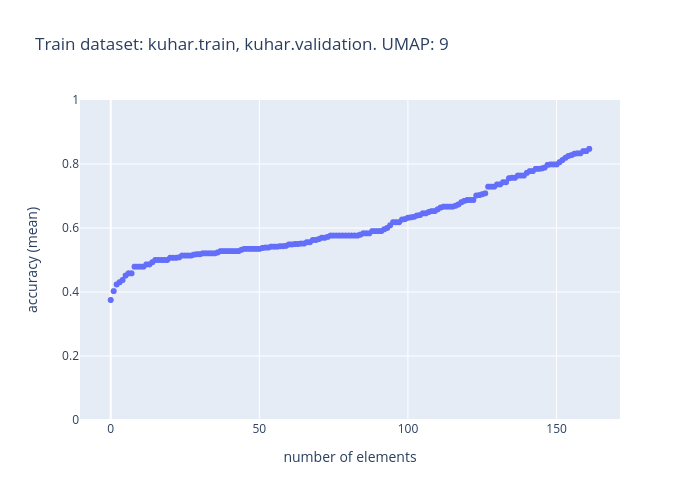

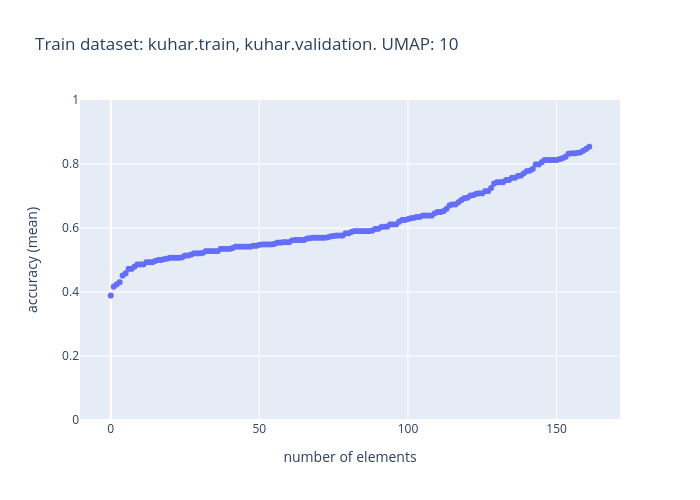

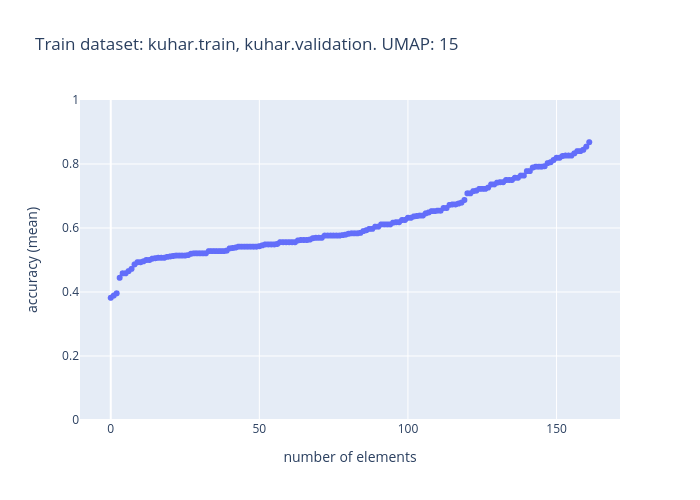

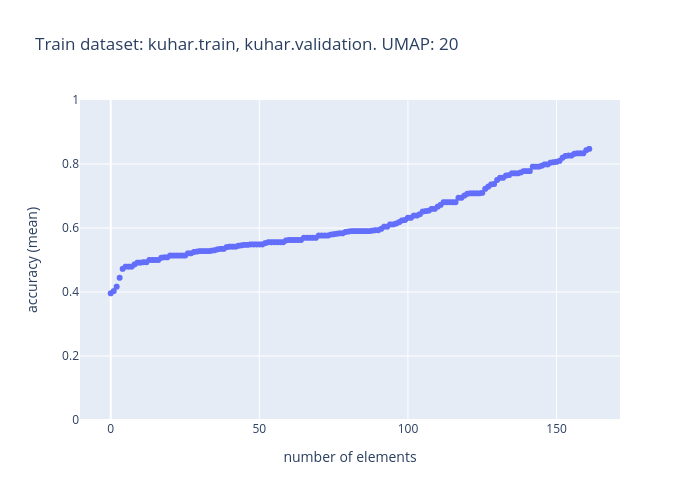

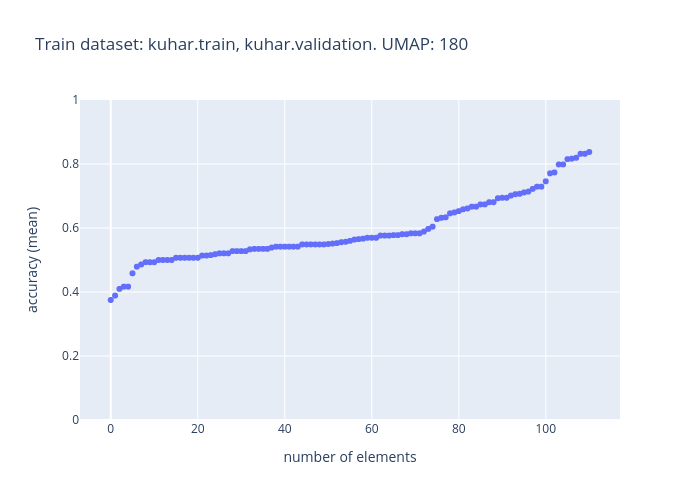

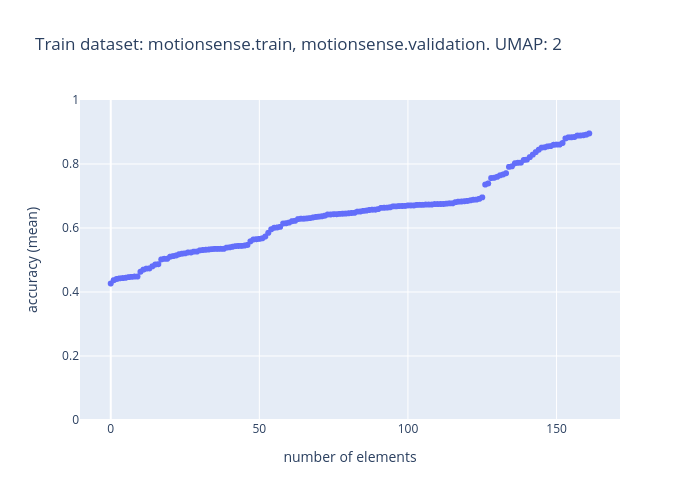

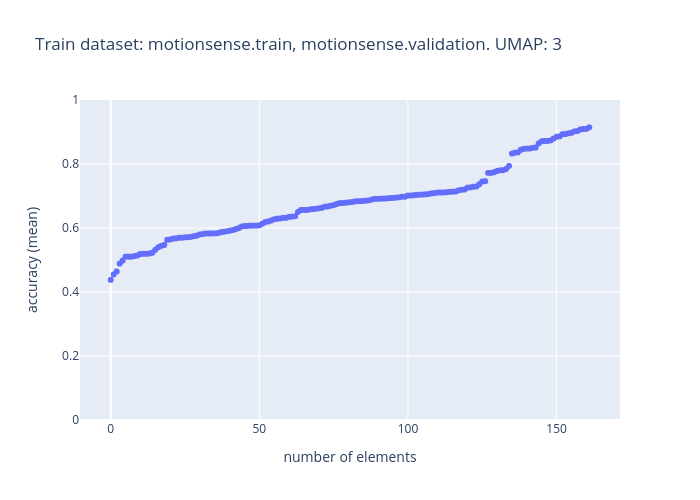

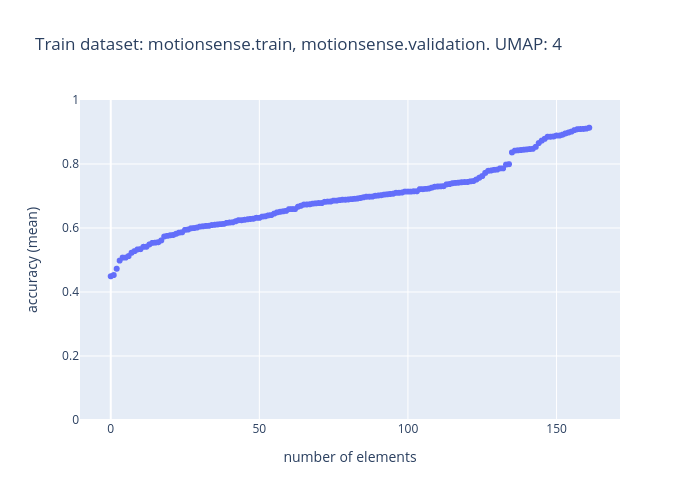

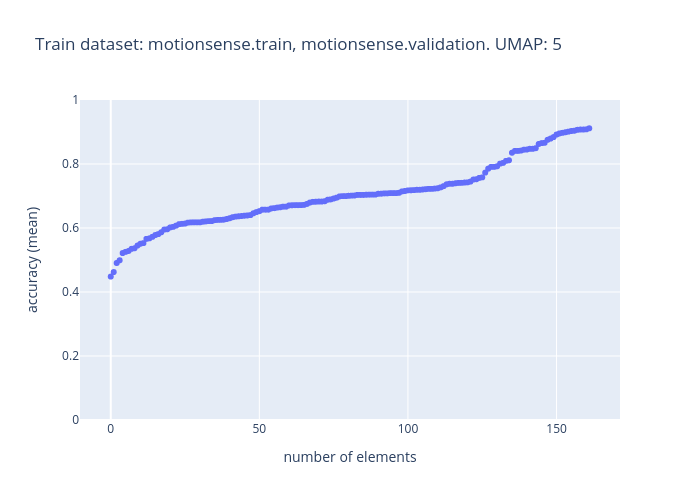

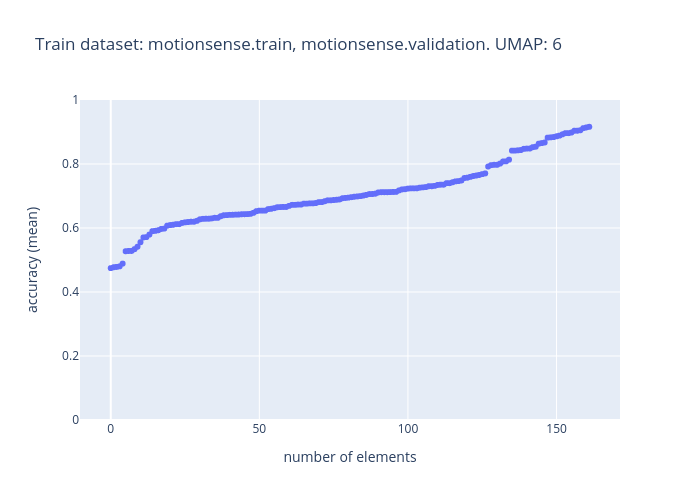

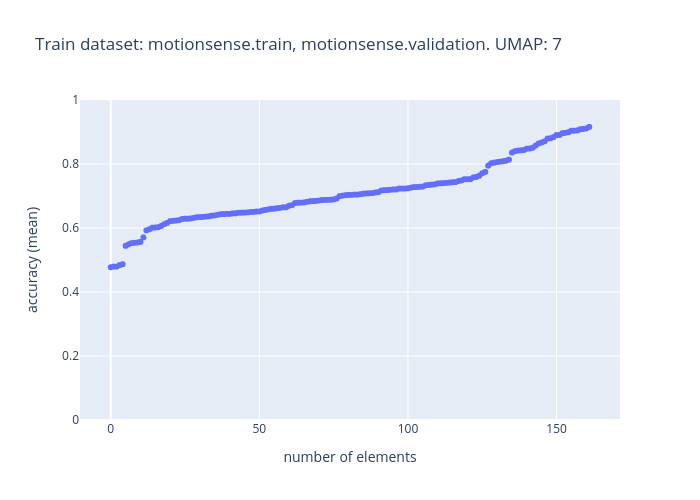

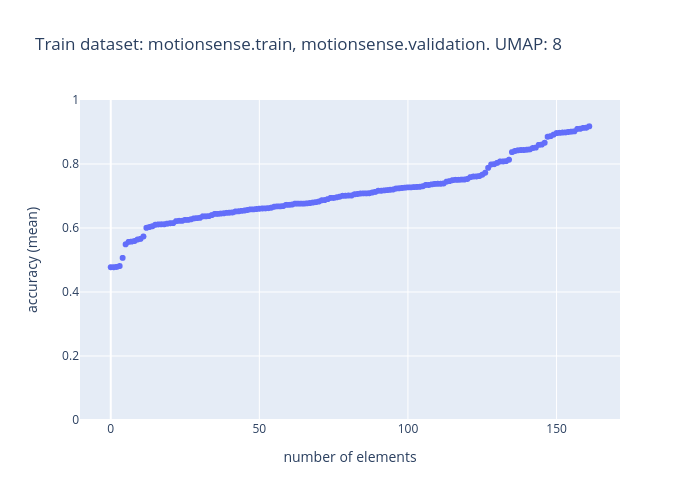

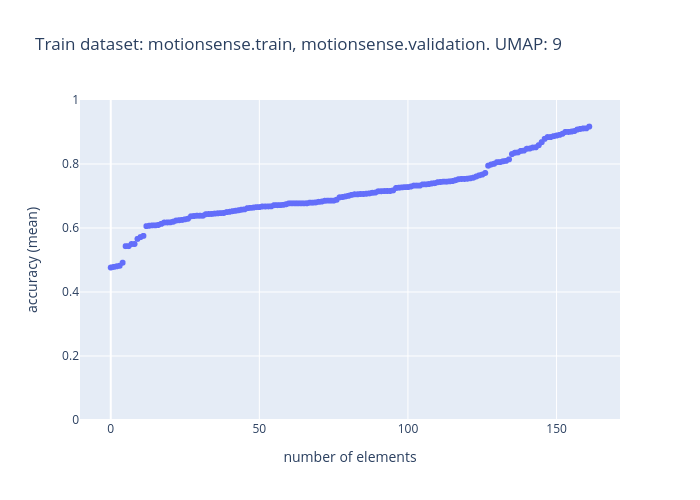

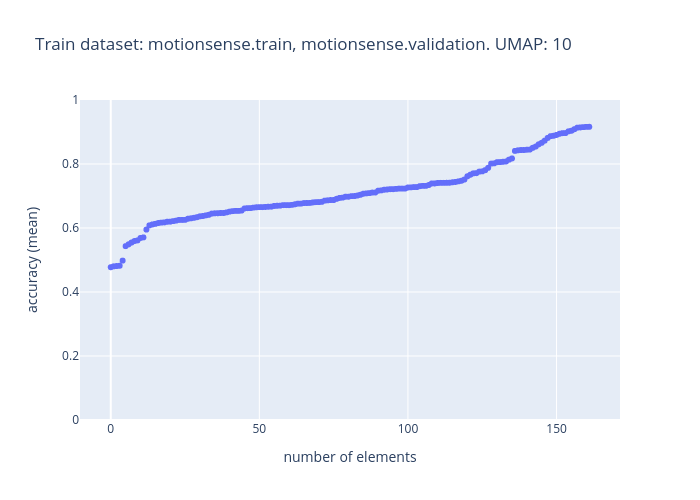

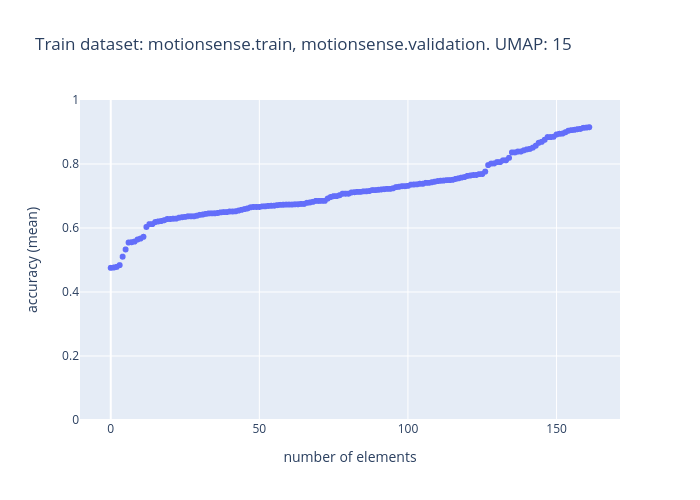

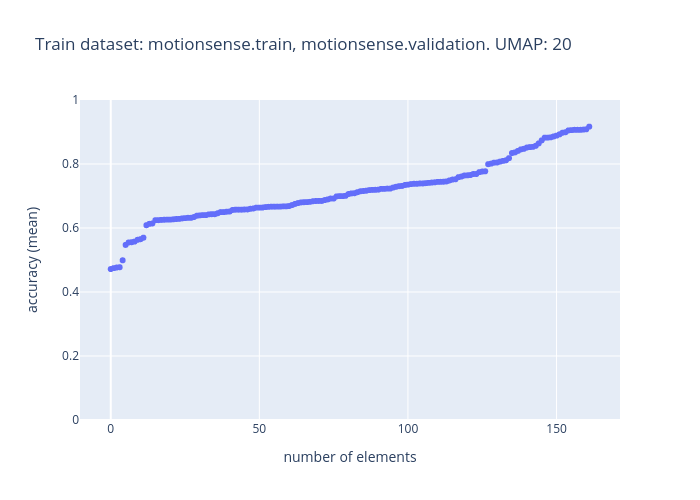

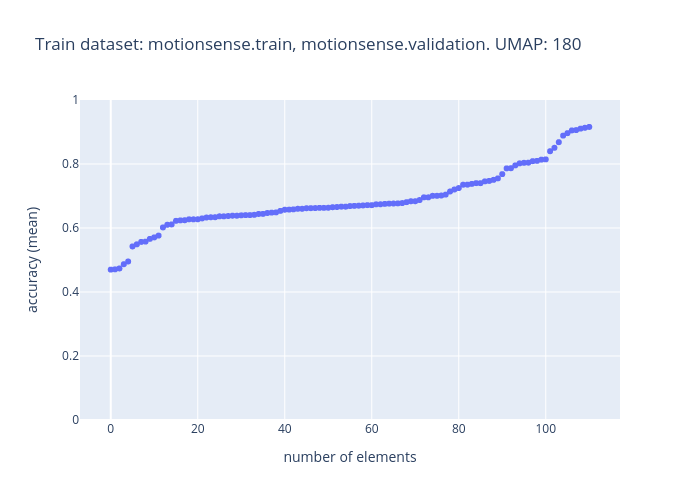

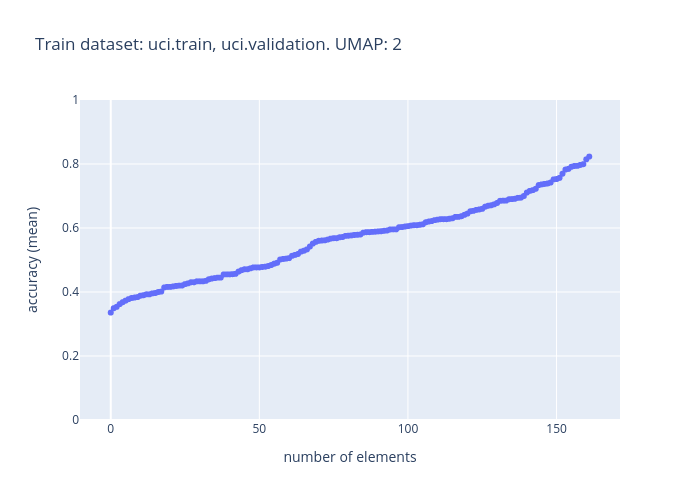

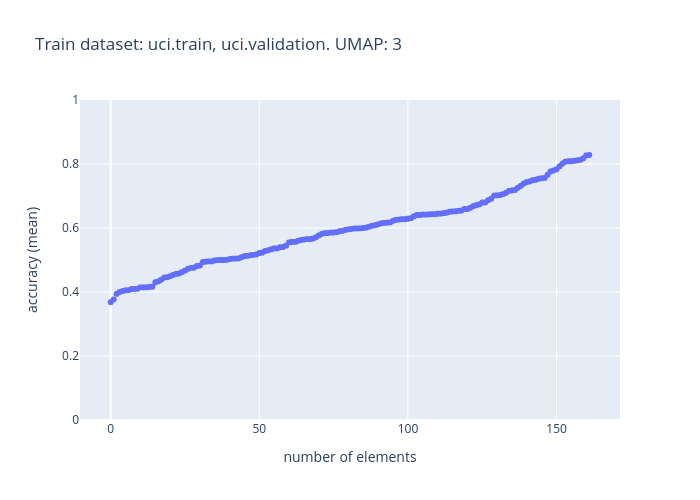

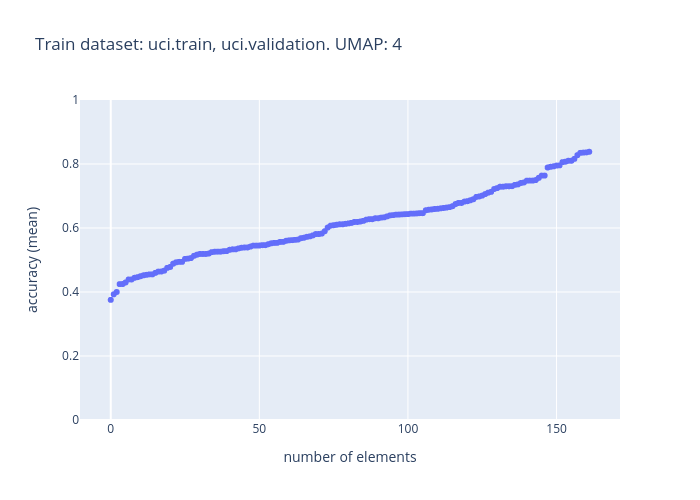

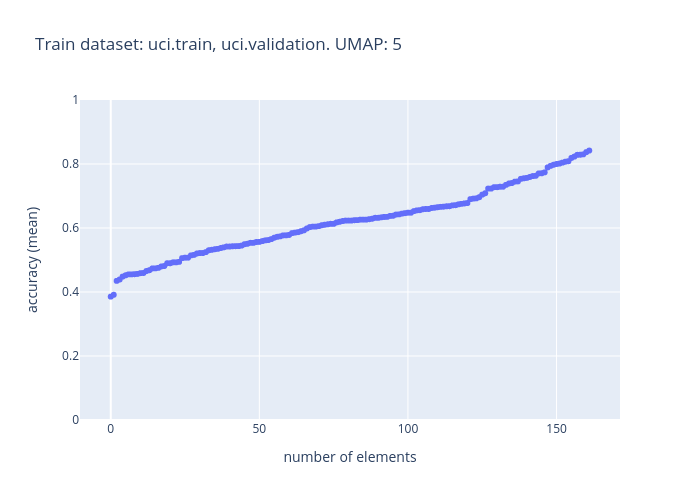

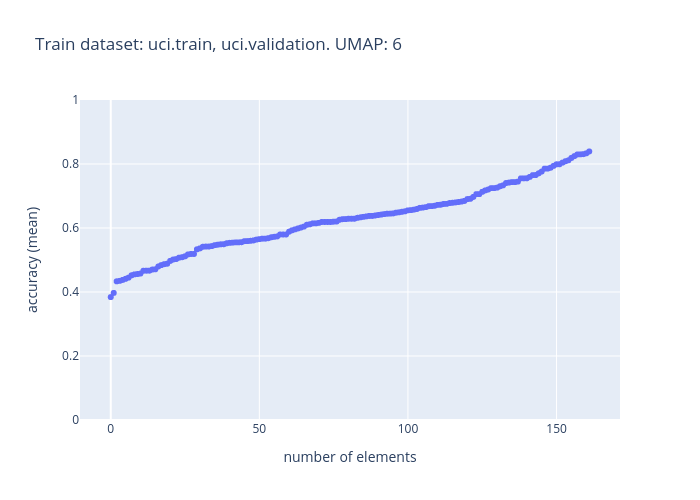

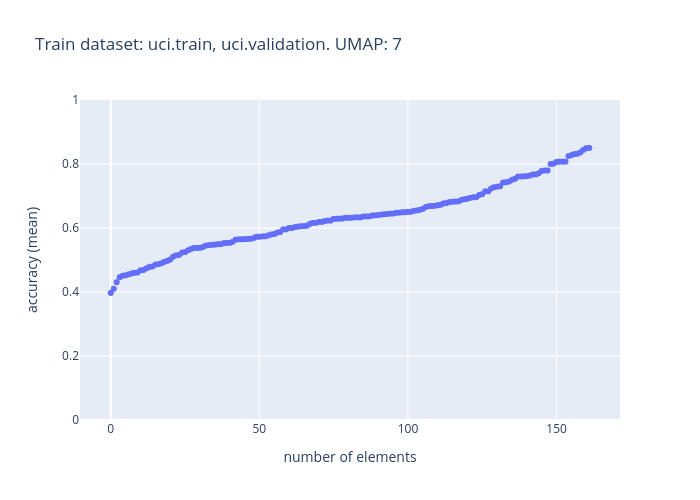

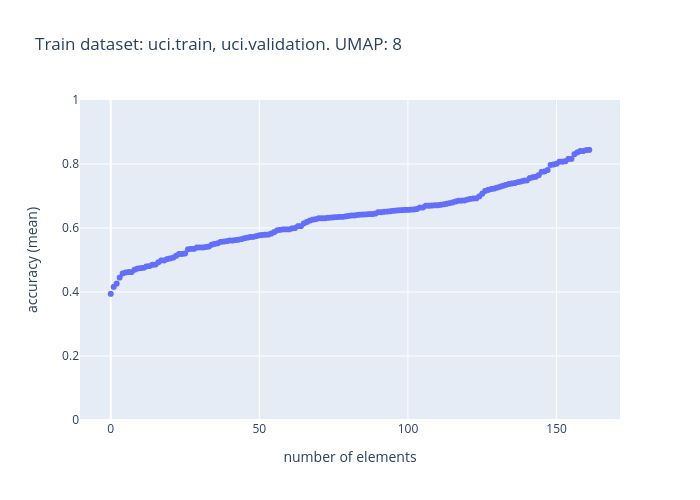

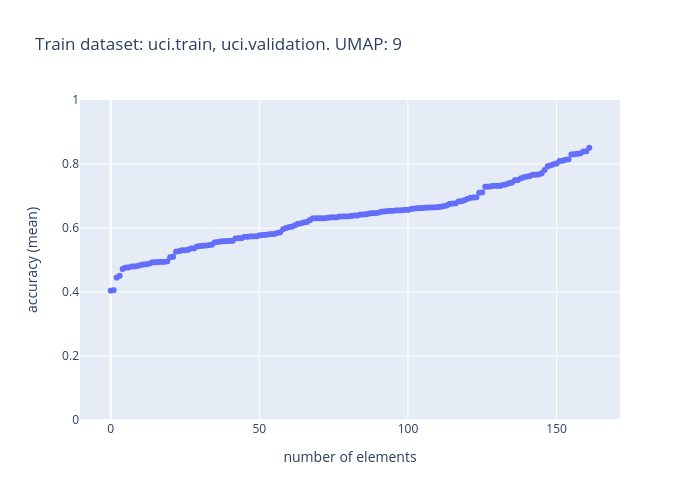

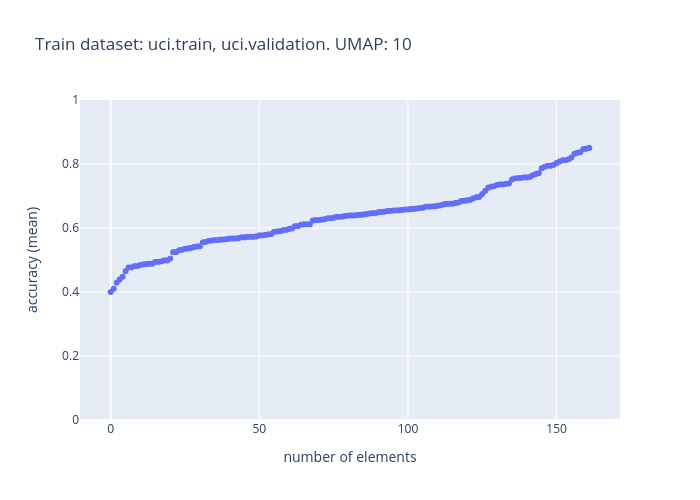

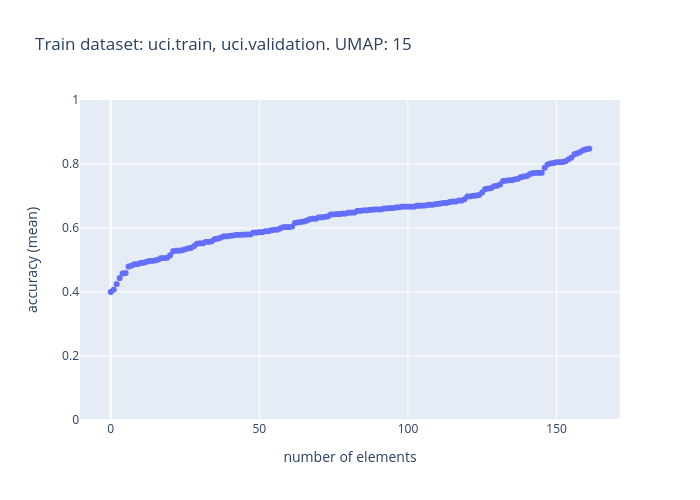

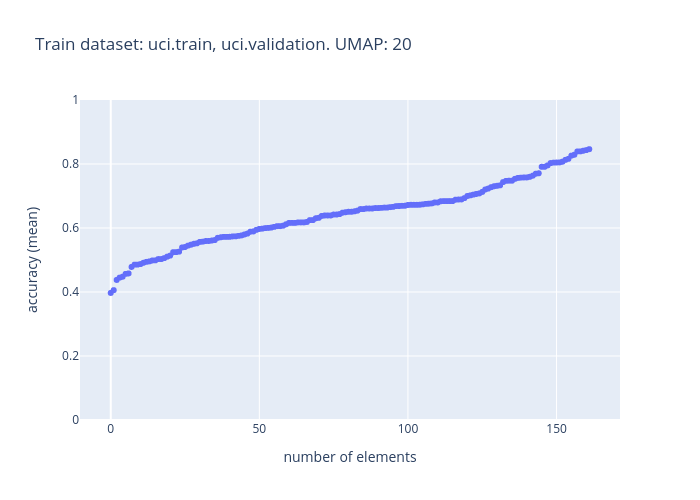

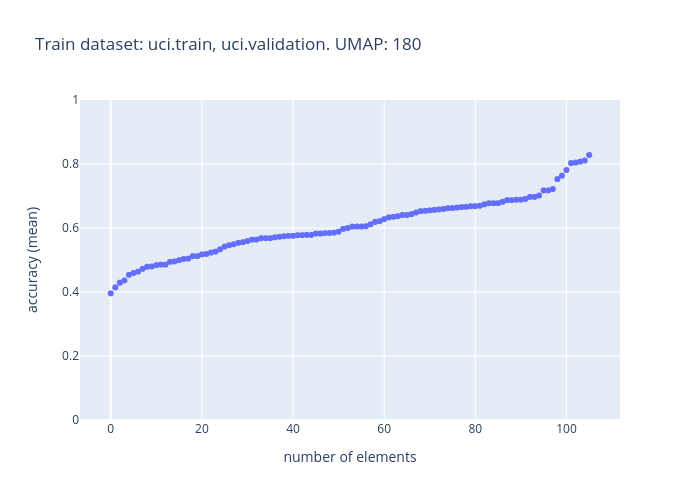

In [64]:
import plotly

for k, df in results.groupby("train_datasets"):
    for c in sorted(df["umap components"].unique()):
        components_df = df[df["umap components"] == c].sort_values("accuracy (mean)")
        # components_df = components_df[components_df["transforms"] == "with_fft_all.0"]
        components_df["number of elements"] = np.arange(0, len(components_df))
        fig = px.scatter(
            components_df,
            x="number of elements",
            y="accuracy (mean)",
            hover_data=[
                "accuracy (mean)",
                "train_datasets",
                "test_datasets",
                "reducer_datasets",
                "umap components",
                "sensors used",
                "transforms"
            ],
            title=f"Train dataset: {k}. UMAP: {c}"
        )
        fig.update_layout(yaxis_range=[0,1])
        fig.show("png")
        # components_df.plot.scatter(x="index", y="accuracy (mean)")
        # plot index and accuracy mean from components_df using plotly
        # ...



In [ ]:
x["datasets"] = x[["reducer_datasets", "train_datasets", "test_datasets"]].apply("/".join, axis=1)
x

,execution_id,classification_time,load_time,reduce_time,transform_time,reduce_on,classifier,reducer,transforms,number runs,reducer_datasets,train_datasets,test_datasets,sensors used,umap components,use accel-x,use accel-y,use accel-z,use gyro-x,use gyro-y,use gyro-z,kuhar - reduce,motionsense - reduce,wisdm - reduce,uci - reduce,realworld - reduce,extrasensory - reduce,kuhar - train,motionsense - train,wisdm - train,uci - train,realworld - train,extrasensory - train,kuhar - test,motionsense - test,wisdm - test,uci - test,realworld - test,extrasensory - test,accuracy (mean),accuracy (std),f1-score macro (mean),f1-score macro (std),f1-score micro (mean),f1-score micro (std),f1-score weighted (mean),f1-score weighted (std),datasets
0,21,5.228354,3.860938,56.306901,0.026190,all,randomforest-100,umap-2-all,no_transform.0,5,"kuhar.train, kuhar.validation","uci.train, uci.validation",uci.test,"accel-x, accel-y, accel-z",2,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.357101,6.895871e-03,0.358008,0.006697,0.357101,6.895871e-03,0.358008,0.006697,"kuhar.train, kuhar.validation/uci.train, uci.v..."
1,18,3.755079,3.130543,59.477098,0.047308,all,randomforest-100,umap-2-all,no_transform.0,5,"kuhar.train, kuhar.validation","uci.train, uci.validation",uci.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",2,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.358841,7.591769e-03,0.357751,0.007570,0.358841,7.591769e-03,0.357751,0.007570,"kuhar.train, kuhar.validation/uci.train, uci.v..."
2,372,7.365569,3.965144,62.086921,0.016687,all,svm,umap-4-all,no_transform.0,5,"kuhar.train, kuhar.validation","uci.train, uci.validation",uci.test,"accel-x, accel-y, accel-z",4,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.373913,0.000000e+00,0.293075,0.000000,0.373913,0.000000e+00,0.293075,0.000000,"kuhar.train, kuhar.validation/uci.train, uci.v..."
3,1892,1.712052,2.527650,165.048812,0.299027,all,svm,umap-180-all,with_fft_all.0,5,"uci.train, uci.validation","kuhar.train, kuhar.validation",kuhar.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",180,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.375000,0.000000e+00,0.271113,0.000000,0.375000,0.000000e+00,0.271113,0.000000,"uci.train, uci.validation/kuhar.train, kuhar.v..."
4,210,5.467367,4.244175,59.472206,0.024585,all,svm,umap-3-all,no_transform.0,5,"kuhar.train, kuhar.validation","uci.train, uci.validation",uci.test,"accel-x, accel-y, accel-z",3,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.376812,0.000000e+00,0.283500,0.000000,0.376812,0.000000e+00,0.283500,0.000000,"kuhar.train, kuhar.validation/uci.train, uci.v..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,307,0.760104,5.084112,54.008703,1.231326,all,knn-5,umap-3-all,with_fft_all.0,5,"motionsense.train, motionsense.validation","motionsense.train, motionsense.validation",motionsense.test,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",3,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.912429,1.110223e-16,0.912448,0.000000,0.912429,1.110223e-16,0.912448,0.000000,"motionsense.train, motionsense.validation/moti..."
1491,1225,6.419500,4.764034,62.908234,1.118438,all,randomforest-100,umap-9-all,with_fft_all.0,5,"motionsense.train, motionsense.validation","motionsense.train, motionsense.validation",motionsense.test,"accel-x, accel-y, acc

In [ ]:
for k, v in results.groupby("train_datasets"):
    print(v.sort_values(by="accuracy (mean)", ascending=False)[["accuracy (mean)", "train_datasets", "test_datasets", "reducer_datasets","umap components"]].reset_index(drop=True).head(5))
    v = v.loc[~v["reducer_datasets"].str.contains(k)]
    print(v.sort_values(by="accuracy (mean)", ascending=False)[["accuracy (mean)", "train_datasets", "test_datasets", "reducer_datasets","umap components"]].reset_index(drop=True).head(5))
    print("----------------------------------")

   accuracy (mean)                 train_datasets test_datasets               reducer_datasets  umap components
0         0.854167  kuhar.train, kuhar.validation    kuhar.test  kuhar.train, kuhar.validation                9
1         0.854167  kuhar.train, kuhar.validation    kuhar.test  kuhar.train, kuhar.validation                3
2         0.854167  kuhar.train, kuhar.validation    kuhar.test  kuhar.train, kuhar.validation                9
3         0.852778  kuhar.train, kuhar.validation    kuhar.test  kuhar.train, kuhar.validation               20
4         0.850000  kuhar.train, kuhar.validation    kuhar.test  kuhar.train, kuhar.validation              180
   accuracy (mean)                 train_datasets test_datasets           reducer_datasets  umap components
0         0.802778  kuhar.train, kuhar.validation    kuhar.test  uci.train, uci.validation               20
1         0.791667  kuhar.train, kuhar.validation    kuhar.test  uci.train, uci.validation               15
2   

In [ ]:
good_treshold = 0.70
y = x.loc[x["accuracy (mean)"] >= good_treshold]
y.datasets.value_counts()

motionsense.train, motionsense.validation/motionsense.train, motionsense.validation/motionsense.test    111
kuhar.train, kuhar.validation/kuhar.train, kuhar.validation/kuhar.test                                   80
uci.train, uci.validation/uci.train, uci.validation/uci.test                                             78
uci.train, uci.validation/motionsense.train, motionsense.validation/motionsense.test                     55
kuhar.train, kuhar.validation/motionsense.train, motionsense.validation/motionsense.test                 53
uci.train, uci.validation/kuhar.train, kuhar.validation/kuhar.test                                       30
kuhar.train, kuhar.validation/uci.train, uci.validation/uci.test                                         20
motionsense.train, motionsense.validation/kuhar.train, kuhar.validation/kuhar.test                        1
Name: datasets, dtype: int64

In [ ]:
good_treshold = 0.70
y = x.loc[x["accuracy (mean)"] >= good_treshold]
y["sensors used"].value_counts()

accel-x, accel-y, accel-z                            43
accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z    40
Name: sensors used, dtype: int64

In [ ]:
good_treshold = 0.70
y = x.loc[x["accuracy (mean)"] >= good_treshold]
y.groupby("reduce_on")["accuracy (mean)"].mean()

reduce_on
all    0.755874
Name: accuracy (mean), dtype: float64

In [ ]:
good_treshold = 0.70
y = x.loc[x["accuracy (mean)"] >= good_treshold]
y["transforms"].value_counts()

no_transform.0    43
with_fft_all.0    40
Name: transforms, dtype: int64

In [ ]:
good_treshold = 0.70
y = x.loc[x["accuracy (mean)"] >= good_treshold]
y = y.loc[(y["datasets"] == "wisdm/wisdm/extrasensory") & (y["transforms"] == "with_fft_all.0")]
y

,execution_id,classification_time,load_time,reduce_time,transform_time,reduce_on,classifier,reducer,transforms,number runs,reducer_datasets,train_datasets,test_datasets,sensors used,umap components,use accel-x,use accel-y,use accel-z,use gyro-x,use gyro-y,use gyro-z,kuhar - reduce,motionsense - reduce,wisdm - reduce,uci - reduce,realworld - reduce,extrasensory - reduce,kuhar - train,motionsense - train,wisdm - train,uci - train,realworld - train,extrasensory - train,kuhar - test,motionsense - test,wisdm - test,uci - test,realworld - test,extrasensory - test,accuracy (mean),accuracy (std),f1-score macro (mean),f1-score macro (std),f1-score micro (mean),f1-score micro (std),f1-score weighted (mean),f1-score weighted (std),datasets
12516,5917,13.894960,15.644570,135.852840,0.000021,all,randomforest-100,umap-3-all,with_fft_all.0,5,wisdm,wisdm,extrasensory,"accel-x, accel-y, accel-z",3,True,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0.743233,0.004167,0.182114,0.000265,0.743233,0.004167,0.775197,0.002104,wisdm/wisdm/extrasensory
12519,9517,29.188136,13.432110,118.659405,0.000023,all,randomforest-100,umap-4-all,with_fft_all.0,5,wisdm,wisdm,extrasensory,"accel-x, accel-y, accel-z",4,True,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0.746550,0.003949,0.185411,0.002970,0.746550,0.003949,0.778044,0.002097,wisdm/wisdm/extrasensory
12522,13116,19.025968,9.779650,103.872057,0.000031,all,randomforest-100,umap-5-all,with_fft_all.0,5,wisdm,wisdm,extrasensory,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",5,True,True,True,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0.748013,0.010951,0.181337,0.001306,0.748013,0.010951,0.774813,0.006220,wisdm/wisdm/extrasensory
12530,5916,13.196632,15.901647,141.245802,0.000038,all,randomforest-100,umap-3-all,with_fft_all.0,5,wisdm,wisdm,extrasensory,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",3,True,True,True,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0.752250,0.005792,0.182500,0.001012,0.752250,0.005792,0.777006,0.003359,wisdm/wisdm/extrasensory
12534,27516,47.705746,21.576339,178.936353,0.000025,all,randomforest-100,umap-9-all,with_fft_all.0,5,wisdm,wisdm,extrasensory,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",9,True,True,True,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0.757487,0.053106,0.181830,0.006866,0.757487,0.053106,0.778693,0.031014,wisdm/wisdm/extrasensory
12544,16717,22.178524,39.993010,129.359218,0.000030,all,randomforest-100,umap-6-all,with_fft_all.0,5,wisdm,wisdm,extrasensory,"accel-x, accel-y, accel-z",6,True,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0.776361,0.003782,0.185750,0.000353,0.776361,0.003782,0.794625,0.001650,wisdm/wisdm/extrasensory
12554,9516,17.980985,10.682302,105.808013,0.000027,all,randomforest-100,umap-4-all,with_fft_all.0,5,wisdm,wisdm,extrasensory,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",4,True,True,True,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0.786362,0.011910,0.186306,0.001386,0.786362,0.011910,0.794990,0.006252,wisdm/wisdm/extrasensory
12558,31116,36.256976,11.632054,140.250046,0.000025,all,randomforest-100,umap-10-all,with_fft_all.0,5,wisdm,wisdm,extrasensory,"accel-x, accel-y, accel-z, gyro-x, gyro-y, gyro-z",10,True,True,True,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0.793685,0.005037,0.195046,0.000741,0.793685,0.005037,0.801032,0.002617,wisdm/wisdm/extrasensory
